A/B testing as the act of testing two alternatives, A and B, and use the test result to choose which alternative is superior to the other

For convenience, let’s call this type of A/B testing as the binary A/B testing.

A/B testing in fact can be made more general, i.e. to include more than two alternatives/classes to be tested. To name a few, analyzing click-through rate (CTR) from a multisegment digital campaign and redemption rate of various tiers of promos are two nice examples of such multiclass A/B testing.

The difference in the number of classes involved between binary and multiclass A / B testing also results in a slight difference in the statistical methods used to draw conclusions from them. While in binary testings one would straightforwardly use a simple t-test, it turns out that an additional (preliminary) step is needed for their multiclass counterparts.

# Chi-squared homogeneity test

Chi-squared homogeneity test is a statistical test to evaluate whether or not the distributions of categorical variables within a set of classes are actually homogenous (i.e. the distributions are relatively the same between classes).

In our context, using the chi-squared homogeneity test means we want to test whether all segments actually performed the same in terms of click-through rate (CTR) obtained (meaning the difference in actual CTRs was caused by noise).

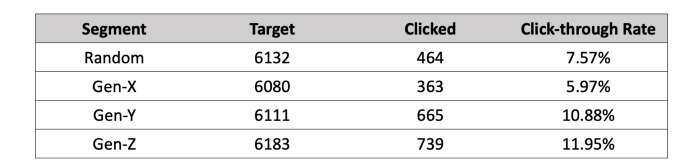

Only if we found that this is not the case (i.e., there is at least one segment that performed differently than the rest), we can go to the next step of the analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import pandas as pd

#import xcode
import sys
sys.path.append(f'E:/gitlab/custom-script/script')
from ursar import statistic


Bad key text.latex.unicode in file E:\programs\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file E:\programs\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file E:\programs\python\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
data = [6132,6080,6111,6183]
data = pd.DataFrame(data,columns=['target'])
data['clicked'] = [464,363,665,739]
data['not_clicked'] = data['target'] - data['clicked']

In [5]:
data

,target,clicked,not_clicked
0,6132,464,5668
1,6080,363,5717
2,6111,665,5446
3,6183,739,5444


In [6]:
from scipy.stats import chi2_contingency 
# defining the table 
stat, p, dof, expected = chi2_contingency(data) 
  
# interpret p-value 
alpha = 0.05
print("p value is " + str(p)) 
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 
print('\n')
print("chi2 value is " + str(stat))
print('Degrees of freedom is ' + str(dof))

p value is 7.703509876578466e-35
Dependent (reject H0)


chi2 value is 173.6120908429856
Degrees of freedom is 6


The X2 = ~173.61, p-value = ~7.7e-35 and degrees of freedom = 6

In [7]:
statistic.chi_squared(data)

p value = 7.703509876578466e-35
Dependent (reject H0)


chi2 value = 173.6120908429856
Degrees of freedom = 6


(<module 'scipy.stats' from 'E:\\programs\\python\\lib\\site-packages\\scipy\\stats\\__init__.py'>,
 7.703509876578466e-35,
 6,
 array([[6132.        ,  558.25071411, 5573.74928589],
        [6080.        ,  553.51668979, 5526.48331021],
        [6111.        ,  556.3388966 , 5554.6611034 ],
        [6183.        ,  562.8936995 , 5620.1063005 ]]))

As we can see, we got an extremely small p-value which is indeed smaller than our significance level (alpha) 0.05. Thus, we are confident that there is at least one age segment that performed differently in terms of CTR it obtained.

# T-test

The chi-squared test hasn’t completely answered our question yet. The only thing it does tell us is that there is at least one age segment that performed differently than the others. Which one is this age group? It doesn’t know.